In [1]:
import tensorflow as tf
import cv2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Layer
from tensorflow.keras import Model
import os
from PIL import Image
import random

In [2]:
dataset_path = r'C:\Users\Siddhartha Devan V\Downloads\datasets\mnist_images'
os.listdir(dataset_path)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

(28, 28, 3)


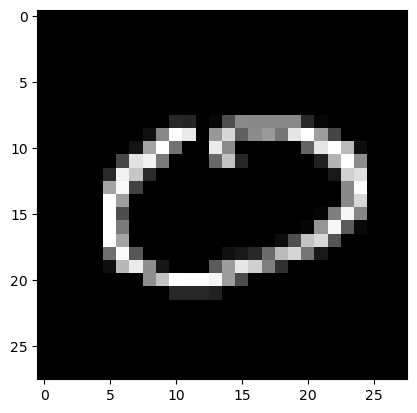

In [3]:
img = cv2.imread(r"C:\Users\Siddhartha Devan V\Downloads\datasets\mnist_images\0\0_260.png")
plt.imshow(img)
print(img.shape)

In [17]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Combine training and test data
x_all = np.concatenate([x_train, x_test], axis=0)
y_all = np.concatenate([y_train, y_test], axis=0)


In [50]:
def img_creater(img_gr):
    struct = np.zeros((70,70))

    adder = random.randint(0, 42)

    for i in range(28):
        for j in range(28):
            struct[adder+i][adder+j] += img_gr[i][j]

    height, width = (28,28)
    x_min, x_max = (adder, adder+28)
    y_min, y_max = (adder, adder+28)

    return struct, [0, height, width, x_min, x_max, y_min, y_max]
    

In [ ]:
data_frame = pd.DataFrame(columns=['path', 'height', 'width', 'x_min', 'x_max', 'y_min', 'y_max'])
target_path = r'C:\Users\Siddhartha Devan V\jupyter ml\mnist_bounding_boxes\mnist_img_with_bb'

for i in range(x_all.shape[0]):
    label = y_all[i]

    l_dir = os.path.join(target_path, str(label))
    os.makedirs(l_dir, exist_ok=True)

    img_large, data = img_creater(x_all[i])

    img_path = os.path.join(l_dir, f"{label}_{i}.png")
    cv2.imwrite(img_path, img_large)

    data[0] = img_path
    data_frame.loc[i] = data
    if i==5:
        break

data_frame.to_csv('mnist_img_enlarged_bb.csv')

In [44]:
data_frame = pd.DataFrame(columns=['path', 'height', 'width', 'x_min', 'x_max', 'y_min', 'y_max'])


In [45]:
data_frame.loc[0] = [1,2,3,4,5,6,7]

In [46]:
print(data_frame)

   path  height  width  x_min  x_max  y_min  y_max
0     1       2      3      4      5      6      7


In [4]:

img_gr = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [ ]:
labels = os.listdir(dataset_path)
print(labels)

target_path = r'C:\Users\Siddhartha Devan V\jupyter ml\mnist_bounding_boxes\mnist_img_with_bb'


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [10]:
struct_b = cv2.rectangle(struct, (x_min, y_min), (x_max, y_max), color = (255, 0,0))

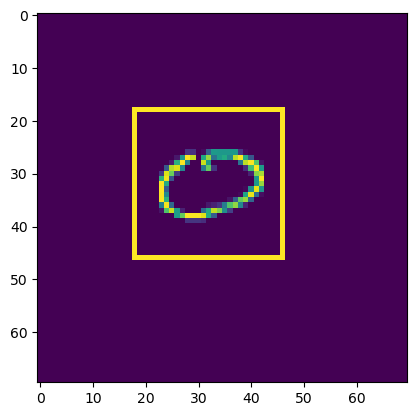

In [11]:
plt.imshow(struct)
